In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("./bilibiliData.csv")
data

,id,playVolume,barrage,comment,coin,collection,like,forward,income
0,1,321,3,26,20,19,51,6,0.51
1,2,5182,34,55,131,158,308,21,21.62
2,3,214,10,20,24,10,30,6,0.22
3,4,5409,440,124,259,280,428,34,27.90
4,5,65000,268,374,4536,2124,6887,131,116.68
5,6,64000,158,247,1128,1476,2638,477,143.77
6,7,47000,113,217,861,640,2170,71,147.86
7,8,261000,679,692,16000,8013,24000,520,877.78
8,9,1742,1,74,33,45,59,38,4.71
9,10,96000,82,358,996,2151,761,328,161.40


In [4]:
x = []
for i in range(len(data["playVolume"])):
    x.append([data["playVolume"][i], data["barrage"][i], data["comment"][i], data["coin"][i], data["collection"][i], data["like"][i], data["forward"][i]])
y = data["income"]

In [5]:
# 测试数据
test1 = {"x": [5521, 442, 124, 263, 287, 434, 36], "y": [28.91]}
test2 = {"x": [5310, 34, 55, 133, 162, 314, 21], "y": [22.61]}
test3 = {"x": [349, 3, 26, 20, 21,53, 6], "y": [0.64]}
test4 = {"x": [218, 10, 20, 24, 10, 30, 6], "y": [0.22]}
test5 = {"x": [1668, 3, 28, 6, 4, 22, 7], "y": [1.74]}
xTest = [test1["x"], test2["x"], test3["x"], test4["x"], test5["x"]]
yTest = [test1["y"], test2["y"], test3["y"], test4["y"], test5["y"]]
# 预测数据
predict = [228000, 1334, 675, 19000, 11000, 20000, 1000]

In [6]:
from sklearn import ensemble
gbrt = ensemble.GradientBoostingRegressor(n_estimators=100)

ModuleNotFoundError: No module named 'sklearn'

In [6]:
gbrt.fit(x, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
print("结果:", "\n",
      "预测值:", [round(i, 2) for i in gbrt.predict(xTest)], "\n",
      "实际值:", [round(i, 2) for i in [28.91, 22.61, 0.64, 0.22, 1.74]], "\n",
      "误差值:", [abs(round(i, 2)) for i in (gbrt.predict(xTest) - [28.91, 22.6, 0.64, 0.22, 1.74])])

结果: 
 预测值: [28.76, 21.69, 1.01, 0.27, 1.67] 
 实际值: [28.91, 22.61, 0.64, 0.22, 1.74] 
 误差值: [0.15, 0.91, 0.37, 0.05, 0.07]


In [8]:
gbrt.score(xTest, yTest)

0.9986830426553628

In [9]:
gbrt.predict([predict])

array([877.71276905])

In [10]:
def tryDifferentModel(model, x=x, y=y, xTest=xTest, yTest=yTest):
    model.fit(x, y)
    return model.predict(xTest), model.score(xTest, yTest)

In [11]:
# 决策树
from sklearn import tree
# modelDecisionTreeRegressor = tree.DecisionTreeRegressor(max_depth=20, random_state=23, min_samples_leaf=9)
modelDecisionTreeRegressor = tree.DecisionTreeRegressor()
modelDecisionTreeRegressor.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [12]:
# 线性回归
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
tryDifferentModel(linear_reg)

(array([26.16487326, 16.37633656,  5.7598429 ,  8.28328712,  9.78586615]),
 0.7353706863986483)

In [13]:
# 决策树回归
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor()
tryDifferentModel(tree_reg)

(array([29.67, 21.62,  1.  ,  0.22,  1.72]), 0.9977929645091117)

In [14]:
# SVM回归
from sklearn import svm
svr = svm.SVR()
tryDifferentModel(svr)

/Users/duansq/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(array([5.47279789, 5.47279789, 5.47279789, 5.37108707, 4.60085658]),
 -0.1783326427853624)

In [15]:
# 随机森林
from sklearn import ensemble
rf =ensemble.RandomForestRegressor(n_estimators=20)#这里使用20个决策树
tryDifferentModel(rf)

(array([35.0255, 21.4575,  0.9445,  0.2345,  1.712 ]), 0.9492326769095154)

In [16]:
ada = ensemble.AdaBoostRegressor(n_estimators=50)
tryDifferentModel(ada)

(array([28.28333333, 22.9675    ,  2.785     ,  2.785     ,  2.785     ]),
 0.9832706365061703)

In [ ]:
# 部分原始数据
raw1 = {"x": [321, 3, 26, 20, 19, 51, 6], "y": [0.51]}
raw2 = {"x": [214, 10, 20, 24, 10, 30, 6], "y": [0.22]}
raw3 = {"x": [5409, 440, 124, 259, 280, 428, 34], "y": [27.90]}
raw4 = {"x": [1742, 1, 74, 33, 45, 59, 38], "y": [4.71]}
raw5 = {"x": [5520, 3, 55, 36, 97, 64, 34], "y": [9.11]}
raw6 = {"x": [1364, 1, 10, 12, 3, 23, 6], "y": [1.53]}
# 测试数据
test1 = {"x": [5521, 442, 124, 263, 287, 434, 36], "y": [28.91]}
test2 = {"x": [5310, 34, 55, 133, 162, 314, 21], "y": [22.61]}
test3 = {"x": [349, 3, 26, 20, 21,53, 6], "y": [0.64]}
test4 = {"x": [218, 10, 20, 24, 10, 30, 6], "y": [0.22]}
test5 = {"x": [1668, 3, 28, 6, 4, 22, 7], "y": [1.74]}
xTest = [test1["x"], test2["x"], test3["x"], test4["x"], test5["x"]]
yTest = [test1["y"], test2["y"], test3["y"], test4["y"], test5["y"]]
# 预测数据
predict1 = [327000, 1707, 993, 31000, 21000, 28000, 10000]
predict2 = [107000, 187, 207, 391, 320, 1262, 10000]
predict3 = [20000, 170, 117, 2706, 1269, 462, 2706, 1000]
predict4 = [228000, 1334, 675, 19000, 11000, 20000, 1000]

# 主成分分析

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [23]:
pca = PCA(n_components=2)

In [30]:
reduced_x = pca.fit_transform(x)

In [31]:
red_x,red_y=[],[]
blue_x,blue_y=[],[]
green_x,green_y=[],[]

In [32]:
for i in range(len(reduced_x)):
    if y[i] ==0:
        red_x.append(reduced_x[i][0])
        red_y.append(reduced_x[i][1])

    elif y[i]==1:
        blue_x.append(reduced_x[i][0])
        blue_y.append(reduced_x[i][1])

    else:
        green_x.append(reduced_x[i][0])
        green_y.append(reduced_x[i][1])

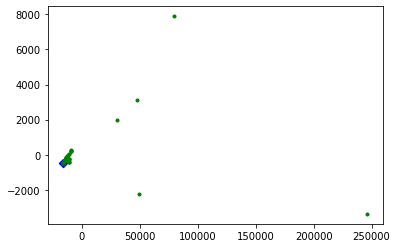

Signature: plt.show(*args, **kw)
Docstring:
Display a figure.

When running in ipython with its pylab mode, display all
figures and return to the ipython prompt.

In non-interactive mode, display all figures and block until
the figures have been closed; in interactive mode it has no
effect unless figures were created prior to a change from
non-interactive to interactive mode (not recommended).  In
that case it displays the figures but does not block.

A single experimental keyword argument, *block*, may be
set to True or False to override the blocking behavior
described above.
File:      ~/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py
Type:      function


In [35]:
plt.scatter(red_x,red_y,c='r',marker='x')
plt.scatter(blue_x,blue_y,c='b',marker='D')
plt.scatter(green_x,green_y,c='g',marker='.')
plt.show()

In [34]:
reduced_x

array([[-1.60529427e+04, -4.59102649e+02],
       [-1.11863825e+04, -2.54481448e+02],
       [-1.61611442e+04, -4.53989079e+02],
       [-1.09389892e+04, -4.20881601e+02],
       [ 4.91539896e+04, -2.23489987e+03],
       [ 4.76047763e+04,  3.10155469e+03],
       [ 3.06166434e+04,  1.99006099e+03],
       [ 2.46318951e+05, -3.37634915e+03],
       [-1.46371859e+04, -3.30674602e+02],
       [ 7.92924285e+04,  7.89524672e+03],
       [-9.23509321e+03,  2.46358861e+02],
       [-1.31855612e+04, -1.36539565e+02],
       [-9.24837074e+03,  2.21744188e+02],
       [-1.34350054e+04, -1.85765055e+02],
       [-1.46136666e+04, -2.94385689e+02],
       [-1.52377421e+04, -3.45463358e+02],
       [-1.33331854e+04, -1.65729470e+02],
       [-1.08772697e+04,  4.02544723e+01],
       [-9.29368084e+03,  1.93251213e+02],
       [-1.28347580e+04, -1.52201463e+02],
       [-1.36510662e+04, -1.99333930e+02],
       [-1.45903226e+04, -3.26827522e+02],
       [-1.47157084e+04, -2.89633365e+02],
       [-1.